In [71]:
import numpy as np
import pandas as pd
data =pd.read_csv('/Users/anuragkumar/Desktop/Python/Salary prediction/employee_attrition_data.csv')

In [72]:
data.head(10)

,Employee_ID,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0
5,5,47,Male,Sales,HR Specialist,10,0.889018,237,0,97212,0
6,6,58,Male,Marketing,HR Specialist,5,0.688977,155,1,97865,0
7,7,57,Female,Sales,Analyst,8,0.981679,171,0,50113,0
8,8,34,Female,Finance,Accountant,6,0.010381,177,1,88747,1
9,9,57,Female,Marketing,Engineer,7,0.466782,170,0,43283,0


In [73]:
data.isna().sum()

Employee_ID              0
Age                      0
Gender                   0
Department               0
Job_Title                0
Years_at_Company         0
Satisfaction_Level       0
Average_Monthly_Hours    0
Promotion_Last_5Years    0
Salary                   0
Attrition                0
dtype: int64

In [74]:
data.drop(columns="Employee_ID",inplace=True)

In [75]:
data.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [76]:
import matplotlib.pyplot as plt

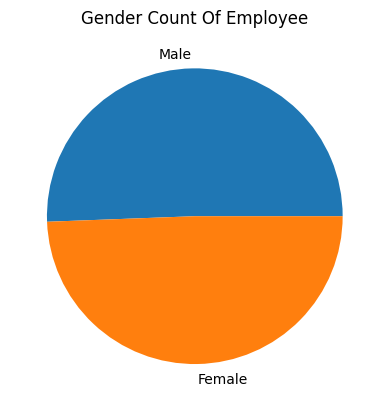

In [77]:
data["Gender"].value_counts().plot(kind="pie")
plt.ylabel("")
plt.title("Gender Count Of Employee")
plt.show()

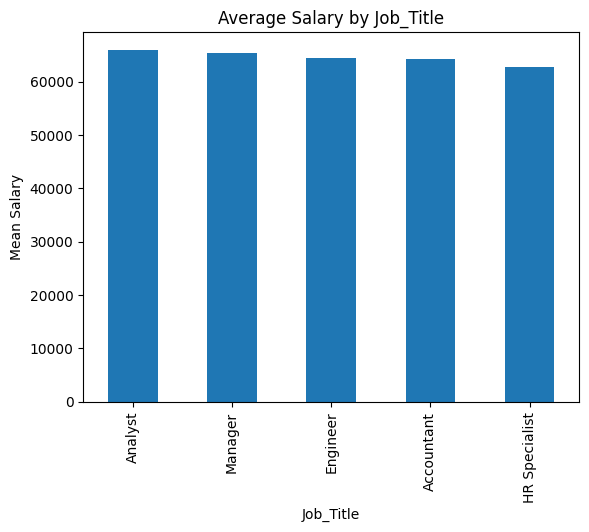

In [78]:
data.groupby("Job_Title")["Salary"].mean().sort_values(ascending=False).plot(kind="bar")
plt.ylabel("Mean Salary")
plt.title("Average Salary by Job_Title")
plt.show()

In [79]:
data.columns
data.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,Male,Marketing,Manager,9,0.586251,151,0,60132,0
1,53,Female,Sales,Engineer,10,0.261161,221,1,79947,0
2,59,Female,Marketing,Analyst,8,0.304382,184,0,46958,1
3,42,Female,Engineering,Manager,1,0.480779,242,0,40662,0
4,44,Female,Sales,Engineer,10,0.636244,229,1,74307,0


In [80]:
data.groupby(["Department","Promotion_Last_5Years"])["Salary"].mean().reset_index()

,Department,Promotion_Last_5Years,Salary
0,Engineering,0,65541.063636
1,Engineering,1,62424.127660
2,Finance,0,63390.145299
3,Finance,1,62041.269663
4,HR,0,63012.556701
5,HR,1,65882.861702
6,Marketing,0,65251.597826
7,Marketing,1,66018.632653
8,Sales,0,64295.846939
9,Sales,1,67838.756757


In [81]:
data.describe()

,Age,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,42.205000,5.605000,0.505995,199.493000,0.486000,64624.980000,0.495000
std,10.016452,2.822223,0.289797,29.631908,0.500054,20262.984333,0.500225
min,25.000000,1.000000,0.001376,150.000000,0.000000,30099.000000,0.000000
25%,33.000000,3.000000,0.258866,173.000000,0.000000,47613.500000,0.000000
50%,43.000000,6.000000,0.505675,201.000000,0.000000,64525.000000,0.000000
75%,51.000000,8.000000,0.761135,225.000000,1.000000,81921.000000,1.000000
max,59.000000,10.000000,0.999979,249.000000,1.000000,99991.000000,1.000000


In [82]:
x=data[["Years_at_Company","Satisfaction_Level","Average_Monthly_Hours"]]
y=data[["Salary"]]

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size= 0.2)

In [109]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = sc.fit_transform(x_train)

In [110]:
x_test.shape


(200, 3)

In [111]:
import joblib
joblib.dump(sc,"sc.pkl")

['sc.pkl']

In [112]:
x_test = sc.fit_transform(x_test)

In [113]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error

def result(prediction):
    print("Mean absolute error {}".format(mean_absolute_error(y_test,prediction)))
    print("Root means squared error {}".format(np.array(mean_squared_error(y_test,prediction))))

In [114]:
from sklearn.linear_model import LinearRegression
lrs=LinearRegression()


In [115]:
lrs.fit(x_train,y_train)

LinearRegression()

In [117]:
prdictionlr=lrs.predict(x_test)

In [118]:
result(prdictionlr)

Mean absolute error 16927.691263295314
Root means squared error 397831883.36008185


In [120]:
joblib.dump(lrs,"model.pkl")

['model.pkl']

In [121]:
x.columns

Index(['Years_at_Company', 'Satisfaction_Level', 'Average_Monthly_Hours'], dtype='object')